### Scoping Project

##### Plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using the past three months of customer data which includes subscription and listening history

### Gathering Data

In [1]:
## importing pandas package

import pandas as pd

In [2]:
## Reading in customer data

customers = pd.read_csv("maven_music_customers.csv")

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [3]:
## Reading in the listening history

listening_history = pd.read_excel("maven_music_listening_history.xlsx")

listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [4]:
## Reading in the audio data

audio = pd.read_excel("maven_music_listening_history.xlsx", sheet_name = 1)

audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [5]:
## Reading in the sessions data

sessions = pd.read_excel("maven_music_listening_history.xlsx", sheet_name = 2)

sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


### Cleaning data

### checking datatypes

In [6]:
customers.dtypes 

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [7]:
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [8]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [9]:
sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

### converting datatypes

In [10]:
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [11]:
customers["Member Since"] = pd.to_datetime(customers["Member Since"])
customers["Subscription Rate"] = pd.to_numeric(customers["Subscription Rate"].str.replace("$", ""))
customers["Cancellation Date"] = pd.to_datetime(customers["Cancellation Date"])

customers.dtypes

C:\Users\sriki\AppData\Local\Temp\ipykernel_24916\2160165887.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customers["Subscription Rate"] = pd.to_numeric(customers["Subscription Rate"].str.replace("$", ""))


Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [12]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [13]:
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

#### Resolving data issues

#### Missing Data 

In [14]:
customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [16]:
customers[customers.isna().any(axis= 1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [17]:
customers["Subscription Plan"].value_counts()

Premium (No Ads)    13
Basic (Ads)         12
Name: Subscription Plan, dtype: int64

In [18]:
customers["Discount?"].value_counts()

Yes    7
Name: Discount?, dtype: int64

In [19]:
customers["Cancellation Date"].value_counts()

2023-06-01    6
2023-06-02    5
2023-06-03    2
Name: Cancellation Date, dtype: int64

In [20]:
customers["Subscription Plan"]

0          Basic (Ads)
1                  NaN
2                  NaN
3          Basic (Ads)
4                  NaN
5                  NaN
6     Premium (No Ads)
7     Premium (No Ads)
8     Premium (No Ads)
9          Basic (Ads)
10         Basic (Ads)
11                 NaN
12    Premium (No Ads)
13         Basic (Ads)
14    Premium (No Ads)
15    Premium (No Ads)
16         Basic (Ads)
17         Basic (Ads)
18         Basic (Ads)
19         Basic (Ads)
20         Basic (Ads)
21    Premium (No Ads)
22    Premium (No Ads)
23    Premium (No Ads)
24         Basic (Ads)
25    Premium (No Ads)
26    Premium (No Ads)
27         Basic (Ads)
28    Premium (No Ads)
29    Premium (No Ads)
Name: Subscription Plan, dtype: object

In [21]:
customers["Discount?"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    Yes
22    Yes
23    Yes
24    NaN
25    Yes
26    Yes
27    NaN
28    Yes
29    Yes
Name: Discount?, dtype: object

In [22]:
customers["Cancellation Date"]

0           NaT
1           NaT
2    2023-06-01
3           NaT
4           NaT
5    2023-06-03
6           NaT
7    2023-06-02
8           NaT
9           NaT
10          NaT
11          NaT
12   2023-06-02
13   2023-06-01
14          NaT
15   2023-06-02
16          NaT
17          NaT
18          NaT
19   2023-06-01
20          NaT
21          NaT
22   2023-06-02
23   2023-06-02
24          NaT
25   2023-06-01
26   2023-06-01
27          NaT
28   2023-06-03
29   2023-06-01
Name: Cancellation Date, dtype: datetime64[ns]

In [23]:
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [24]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [25]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [26]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [27]:
customers[customers["Subscription Plan"].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [28]:
customers["Subscription Rate"].nunique()

4

In [29]:
customers[["Subscription Rate", "Subscription Plan"]].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [30]:
customers["Subscription Plan"].fillna("Basic (Ads)",inplace= True)

In [31]:
customers["Subscription Plan"]

0          Basic (Ads)
1          Basic (Ads)
2          Basic (Ads)
3          Basic (Ads)
4          Basic (Ads)
5          Basic (Ads)
6     Premium (No Ads)
7     Premium (No Ads)
8     Premium (No Ads)
9          Basic (Ads)
10         Basic (Ads)
11         Basic (Ads)
12    Premium (No Ads)
13         Basic (Ads)
14    Premium (No Ads)
15    Premium (No Ads)
16         Basic (Ads)
17         Basic (Ads)
18         Basic (Ads)
19         Basic (Ads)
20         Basic (Ads)
21    Premium (No Ads)
22    Premium (No Ads)
23    Premium (No Ads)
24         Basic (Ads)
25    Premium (No Ads)
26    Premium (No Ads)
27         Basic (Ads)
28    Premium (No Ads)
29    Premium (No Ads)
Name: Subscription Plan, dtype: object

In [32]:
customers[["Customer ID", "Discount?"]].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [33]:
customers["Discount?"].value_counts()

Yes    7
Name: Discount?, dtype: int64

In [34]:
import numpy as np

In [35]:
np.where(customers["Discount?"]== "Yes",1,0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1])

In [36]:
customers["Discount?"] = np.where(customers["Discount?"]=="Yes",1,0)

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [37]:
customers["Cancellation Date"]

0           NaT
1           NaT
2    2023-06-01
3           NaT
4           NaT
5    2023-06-03
6           NaT
7    2023-06-02
8           NaT
9           NaT
10          NaT
11          NaT
12   2023-06-02
13   2023-06-01
14          NaT
15   2023-06-02
16          NaT
17          NaT
18          NaT
19   2023-06-01
20          NaT
21          NaT
22   2023-06-02
23   2023-06-02
24          NaT
25   2023-06-01
26   2023-06-01
27          NaT
28   2023-06-03
29   2023-06-01
Name: Cancellation Date, dtype: datetime64[ns]

### Inconsistent text and typo 

In [38]:
customers.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


In [39]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [40]:
customers[customers["Subscription Rate"]>7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [41]:
customers.iloc[15, 5] = 9.99

In [42]:
customers.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


In [43]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [44]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [45]:
listening_history["Audio Type"].value_counts()

Song       463
Podcast     42
Name: Audio Type, dtype: int64

In [46]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [47]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [48]:
audio["Genre"]

0            Pop
1            Pop
2      Pop Music
3      Pop Music
4      Pop Music
5        Country
6        Country
7        Hip Hop
8        Hip Hop
9        Hip Hop
10          Jazz
11          Jazz
12        Comedy
13        Comedy
14        Comedy
15    True Crime
16    True Crime
Name: Genre, dtype: object

In [49]:
import numpy as np

audio["Genre"] = np.where(audio["Genre"]=="Pop Music", "Pop", audio["Genre"])

audio["Genre"].value_counts()

Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [50]:
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [51]:
sessions["Session Log In Time"].max()

Timestamp('2023-05-31 06:03:00')

In [52]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [53]:
customers["Member Since"].max()

Timestamp('2023-05-16 00:00:00')

#### Duplicates

In [54]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [55]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [56]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [57]:
sessions[sessions.duplicated()]

,Session ID,Session Log In Time


#### Outliers 

In [58]:
customers.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


In [59]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [60]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [61]:
sessions.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


#### Create columns

In [62]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [63]:
customers["Cancelled"] = np.where(customers["Cancellation Date"].notna(), 1, 0)

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [64]:
customers["Email"] = customers.Email.str[6:]

customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


### EDA

In [65]:
## Try to better understand the customers who cancelled:

## How long were they members before they cancelled?
## What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [66]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [67]:
customers[customers["Cancelled"]==1]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [68]:
customers[customers["Cancellation Date"].notna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [69]:
## How long were they members before they cancelled?

(customers["Cancellation Date"] - customers["Member Since"]).mean()

## About 1.5 months... but that might just because we have 3 months of data

Timedelta('46 days 07:23:04.615384615')

In [70]:
discount_yes = customers[customers["Discount?"]==1]

discount_yes.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [71]:
discount_yes["Cancelled"].sum()/discount_yes["Cancelled"].count()

0.8571428571428571

In [72]:
discount_no = customers[customers["Discount?"]==0]

discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [73]:
discount_no["Cancelled"].sum()/discount_no["Cancelled"].count()

0.30434782608695654

In [74]:
pd.DataFrame([["Had Discount", 0.8571428571428571],
             ["Did Not Have Discount", 0.30434782608695654]],
             columns = ["Customer_Type", "Cancellation"])

,Customer_Type,Cancellation
0,Had Discount,0.857143
1,Did Not Have Discount,0.304348


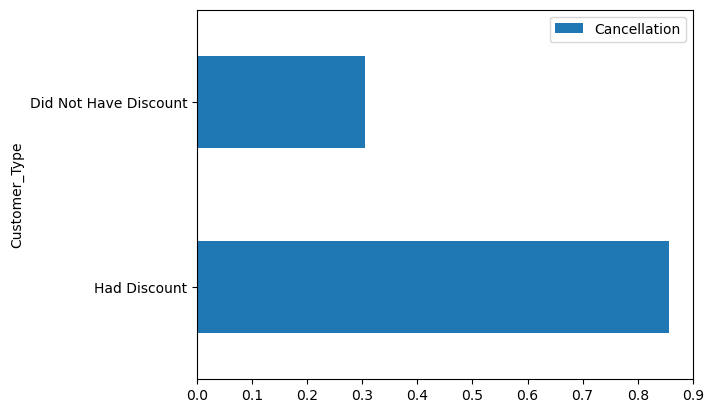

In [75]:
pd.DataFrame([["Had Discount", 0.8571428571428571],
             ["Did Not Have Discount", 0.30434782608695654]],
             columns = ["Customer_Type", "Cancellation"]).plot.barh(x="Customer_Type", y="Cancellation");

In [76]:
## Better understand the customers' listening histories:

## Join together the listening history and audio tables
## How many listening sessions did each customer have in the past 3 months?
## What were the most popular genres that customers listened to?

In [77]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [78]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [79]:
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [80]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [81]:
# Split the ID in the audio data so the column can be joined with other tables

audio_clean = pd.DataFrame(audio["ID"].str.split("-").to_list()).rename(columns={0:"Type",1:"Audio ID"})

audio_clean.head()

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [82]:
# Add the new fields to the original audio table

audio_all = pd.concat([audio_clean, audio], axis=1)

audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [83]:
# If you try to join on the Audio ID, you will get an error
# df = listening_history.merge(audio_all, how='left', on='Audio ID')

In [84]:
# Hint: Check the data type of Audio ID in the audio table

audio_all.dtypes

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [85]:
# Change Audio ID to an int type instead of an object

audio_all["Audio ID"] = audio_all["Audio ID"].astype("int")

audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [86]:
audio_all.dtypes

Type          object
Audio ID       int32
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [87]:
# Try the merge again

df = listening_history.merge(audio_all, how="left", on="Audio ID")

df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


In [88]:
df.groupby("Customer ID")["Session ID"].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

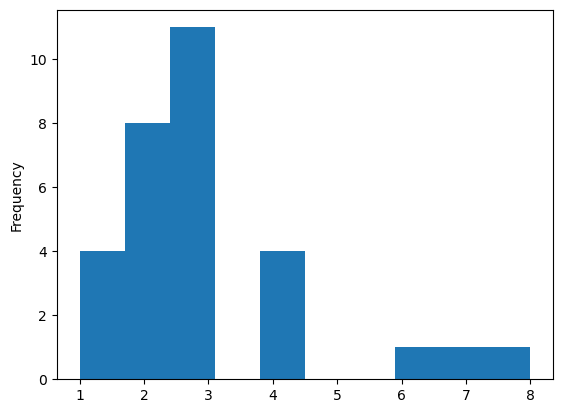

In [89]:
# The number of listening sessions that each customer had in the past 3 months

df.groupby("Customer ID")["Session ID"].nunique().plot.hist();

In [90]:
# The most popular genres that customers listened to

df.Genre.value_counts()

Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Genre, dtype: int64

### Prep for Modeling

In [91]:
# Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:

# Customer ID
# Whether a customer cancelled or not
# Whether a customer received a discount or not
# The number of listening sessions
# Percent of listening history consisting of Pop
# Percent of listening history consisting of Podcasts

In [92]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [93]:
model_df = customers[["Customer ID", "Cancelled", "Discount?"]]

model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [94]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [95]:
# Calculate the number of listening sessions for each customers

df.groupby("Customer ID")["Session ID"].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [96]:
df.groupby("Customer ID")["Session ID"].nunique().rename("Number of Sessions")

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Number of Sessions, dtype: int64

In [97]:
df.groupby("Customer ID")["Session ID"].nunique().rename("Number of Sessions").to_frame()

,Number of Sessions
Customer ID,
5001,8
5002,4
5004,1
5267,7
5338,4
5404,1
5581,3
5759,2
5761,3


In [98]:
number_of_sessions = df.groupby("Customer ID")["Session ID"].nunique().rename("Number of Sessions").to_frame().reset_index()

number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [99]:
# Add it to the modeling dataframe

model_df.merge(number_of_sessions, how = "left", on = "Customer ID")

model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [100]:
df.Genre

0          Pop
1          Pop
2          Pop
3          Pop
4          Pop
        ...   
500       Jazz
501     Comedy
502    Hip Hop
503    Hip Hop
504    Hip Hop
Name: Genre, Length: 505, dtype: object

In [101]:
pd.get_dummies(df.Genre)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [102]:
# Combine it with Customer

pd.concat([df["Customer ID"], pd.get_dummies(df.Genre)], axis = 1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [103]:
# Group it by Customers

genres = pd.concat([df["Customer ID"], pd.get_dummies(df.Genre)], axis = 1).groupby("Customer ID").sum().reset_index()

genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [104]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [105]:
listening_history.groupby("Customer ID")["Audio ID"].count()

Customer ID
5001    60
5002    22
5004     9
5267    45
5338    18
5404     8
5581     5
5759    15
5761     5
5763    31
5826    17
5827     7
6029    12
6092    10
6163     4
6229    13
6406     9
6584    27
6586    22
6588    10
6821    21
6822    15
6824    31
7087    11
7158    13
7224    29
7401    11
7579     9
7581    14
7583     2
Name: Audio ID, dtype: int64

In [106]:
listening_history.groupby("Customer ID")["Audio ID"].count().rename("Total Audio")

Customer ID
5001    60
5002    22
5004     9
5267    45
5338    18
5404     8
5581     5
5759    15
5761     5
5763    31
5826    17
5827     7
6029    12
6092    10
6163     4
6229    13
6406     9
6584    27
6586    22
6588    10
6821    21
6822    15
6824    31
7087    11
7158    13
7224    29
7401    11
7579     9
7581    14
7583     2
Name: Total Audio, dtype: int64

In [107]:
listening_history.groupby("Customer ID")["Audio ID"].count().rename("Total Audio").to_frame()

,Total Audio
Customer ID,
5001,60
5002,22
5004,9
5267,45
5338,18
5404,8
5581,5
5759,15
5761,5


In [108]:
# Add a column for total songs / podcasts listened to

total_audio = listening_history.groupby("Customer ID")["Audio ID"].count().rename("Total Audio").to_frame().reset_index()

total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [109]:
# Create a master audio table to calculate percentages

df_audio = genres.merge(total_audio, how = "left", on = "Customer ID")

df_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [110]:
# Percent pop

model_df["Percent pop"] = (df_audio["Pop"]/df_audio["Total Audio"])*100

model_df.head()

C:\Users\sriki\AppData\Local\Temp\ipykernel_24916\473889454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Percent pop"] = (df_audio["Pop"]/df_audio["Total Audio"])*100


,Customer ID,Cancelled,Discount?,Percent pop
0,5001,0,0,56.666667
1,5002,0,0,0.000000
2,5004,1,0,100.000000
3,5267,0,0,51.111111
4,5338,0,0,0.000000


In [111]:
model_df.head()

,Customer ID,Cancelled,Discount?,Percent pop
0,5001,0,0,56.666667
1,5002,0,0,0.000000
2,5004,1,0,100.000000
3,5267,0,0,51.111111
4,5338,0,0,0.000000


In [112]:
# Percent podcasts

model_df["Percent podcasts"] = ((df_audio["Comedy"] + df_audio["True Crime"])/df_audio["Total Audio"]) * 100

model_df.head()

C:\Users\sriki\AppData\Local\Temp\ipykernel_24916\1338364138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["Percent podcasts"] = ((df_audio["Comedy"] + df_audio["True Crime"])/df_audio["Total Audio"]) * 100


,Customer ID,Cancelled,Discount?,Percent pop,Percent podcasts
0,5001,0,0,56.666667,0.0
1,5002,0,0,0.000000,0.0
2,5004,1,0,100.000000,0.0
3,5267,0,0,51.111111,0.0
4,5338,0,0,0.000000,0.0


In [113]:
model_df.head()

,Customer ID,Cancelled,Discount?,Percent pop,Percent podcasts
0,5001,0,0,56.666667,0.0
1,5002,0,0,0.000000,0.0
2,5004,1,0,100.000000,0.0
3,5267,0,0,51.111111,0.0
4,5338,0,0,0.000000,0.0


In [114]:
## Visualize the relationships in the modeling DataFrame using a pair plot:

# What are some of your observations?
# What variables might do a good job predicting customer cancellation?

In [115]:
model_df

,Customer ID,Cancelled,Discount?,Percent pop,Percent podcasts
0,5001,0,0,56.666667,0.000000
1,5002,0,0,0.000000,0.000000
2,5004,1,0,100.000000,0.000000
3,5267,0,0,51.111111,0.000000
4,5338,0,0,0.000000,0.000000
5,5404,1,0,100.000000,0.000000
6,5581,0,0,0.000000,100.000000
7,5759,1,0,100.000000,0.000000
8,5761,0,0,0.000000,100.000000
9,5763,0,0,64.516129,0.000000


In [116]:
import seaborn as sns

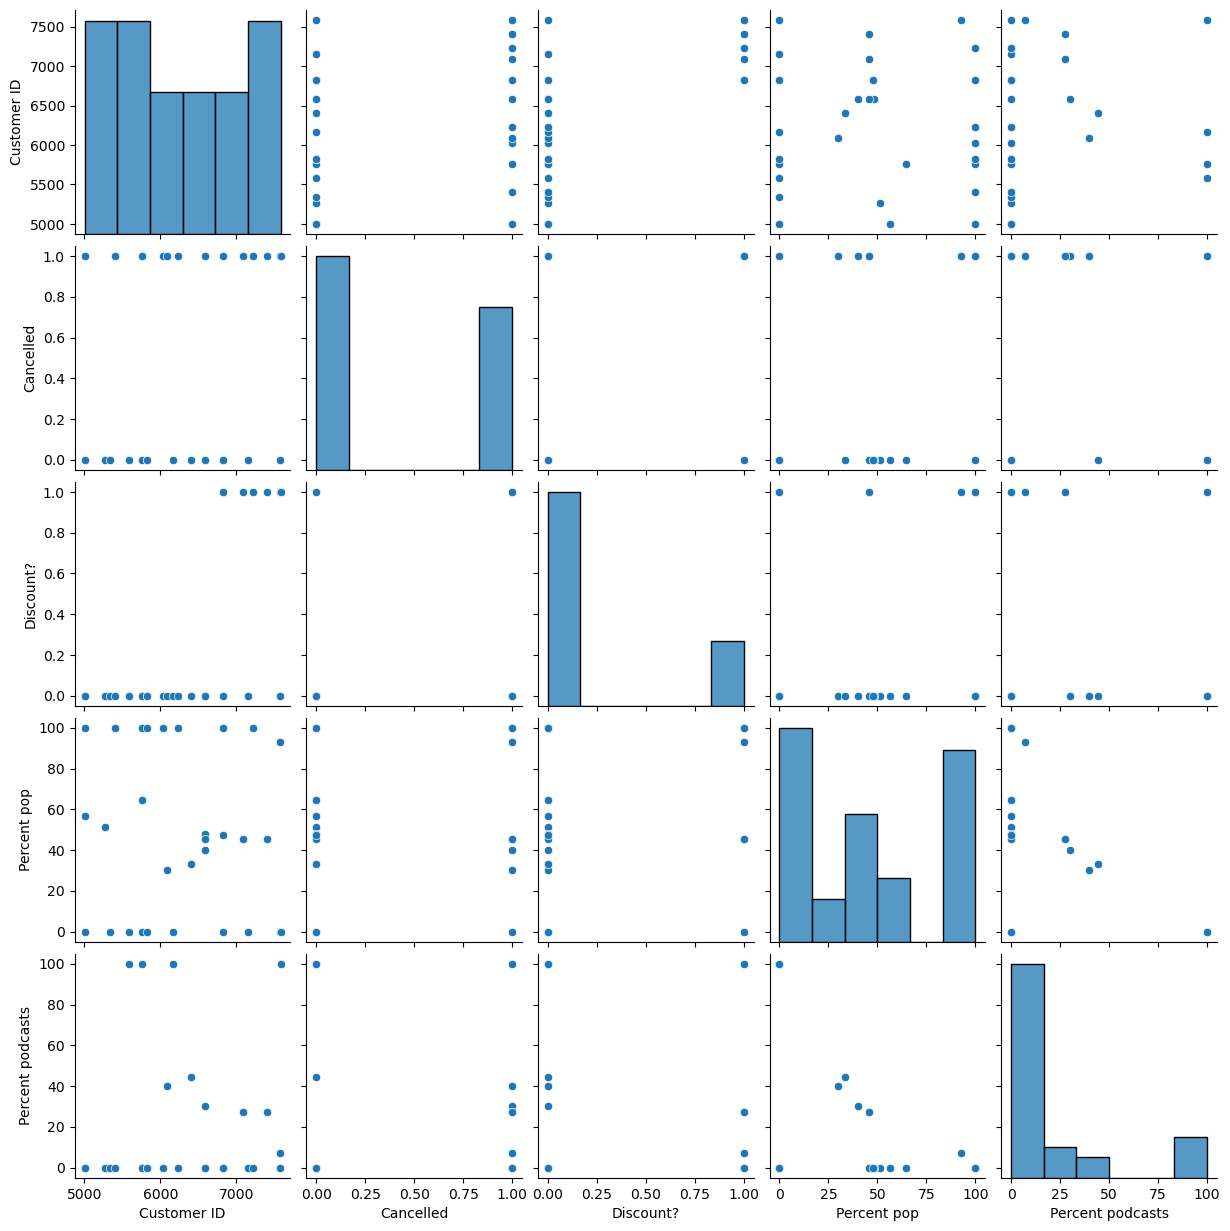

In [117]:
sns.pairplot(model_df);

In [118]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Percent pop,Percent podcasts
Customer ID,1.000000,0.269942,0.648514,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,0.112675,0.062938
Percent pop,-0.076129,0.585630,0.112675,1.000000,-0.487193
Percent podcasts,0.083083,-0.035414,0.062938,-0.487193,1.000000


In [119]:
# Observations
## A discount is correlated with a cancellation
## The more listening sessions, the fewer cancellations
## The more pop music, the more cancellations
## Podcast listening history seems unrelated to cancellations